In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_excel('/content/diabetes.xlsx')
df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
df.shape

(768, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

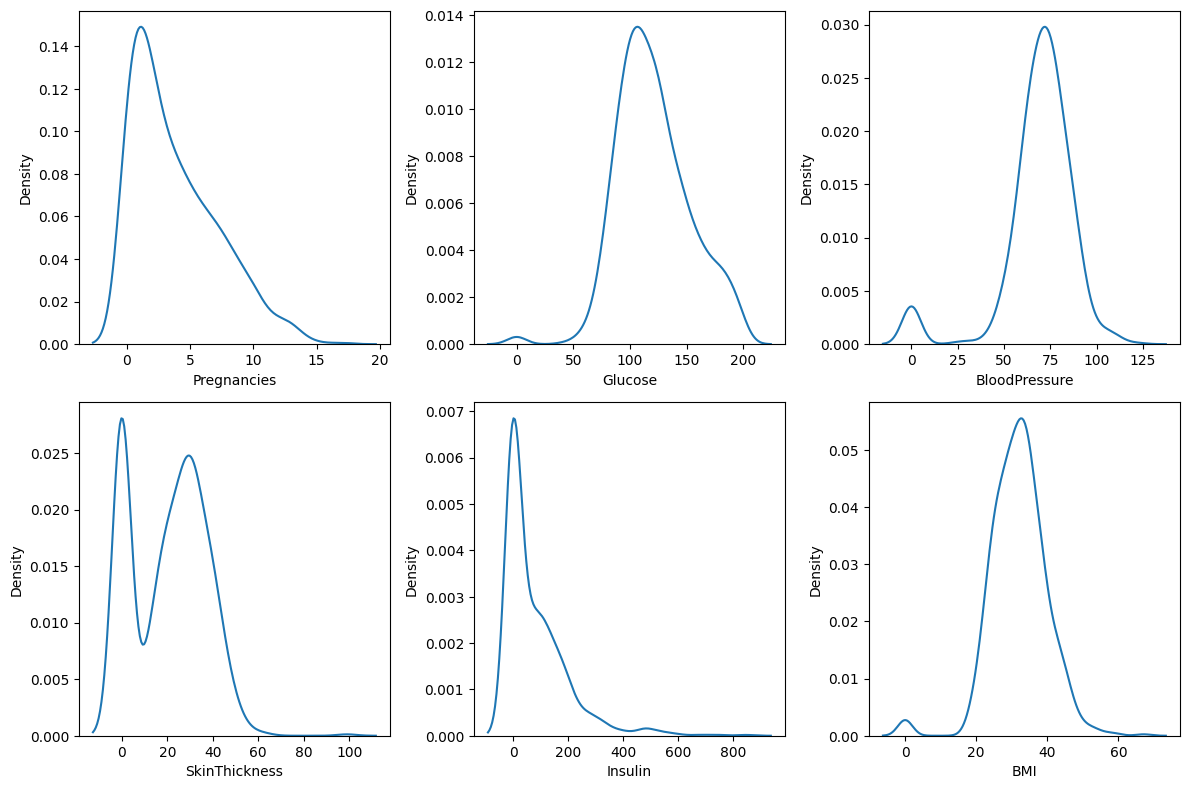

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

r, c = 2, 3  # Define the number of rows and columns for subplots
it = 1

fig, axes = plt.subplots(r, c, figsize=(12, 8))  # Create subplots using plt.subplots()

for i, ax in zip(df.columns, axes.flatten()):
    if df[i].nunique() > 6:
        sns.kdeplot(df[i], ax=ax)
    else:
        # Handle the case when there are fewer than 6 unique values
        sns.countplot(df[i], ax=ax)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [11]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

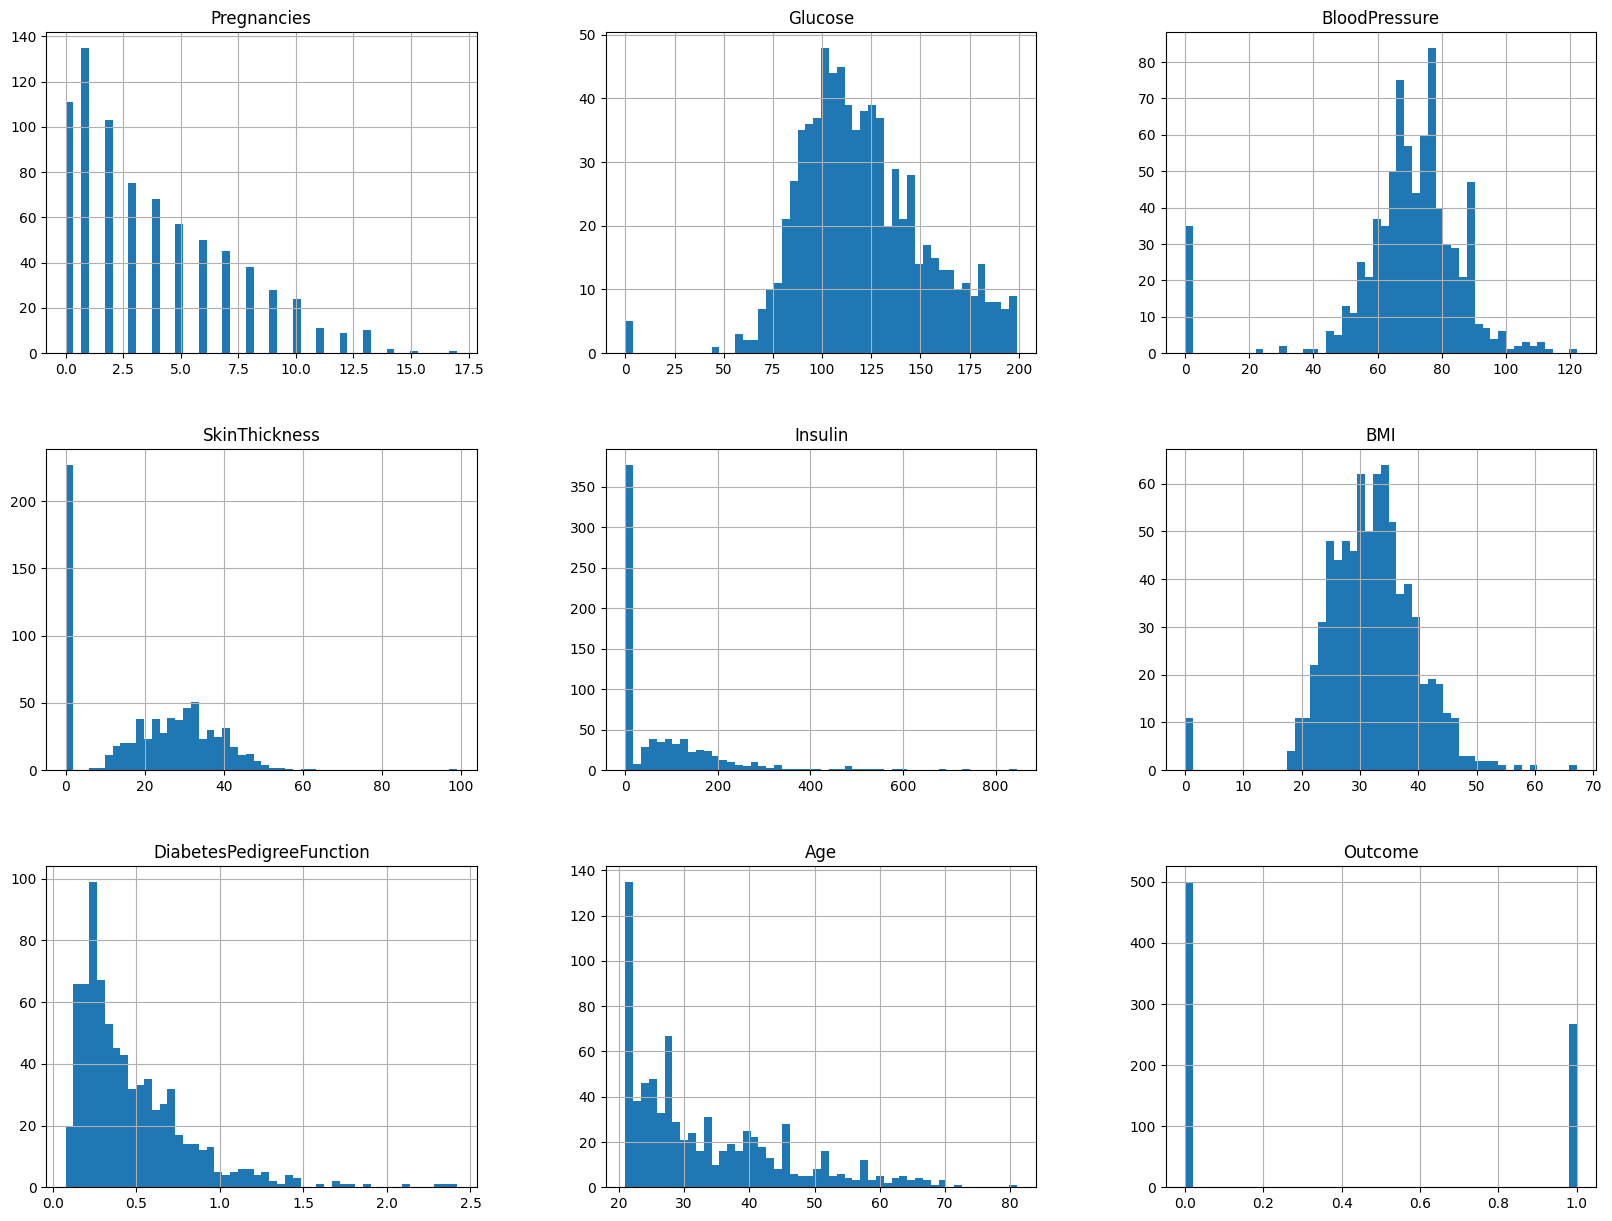

In [12]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))

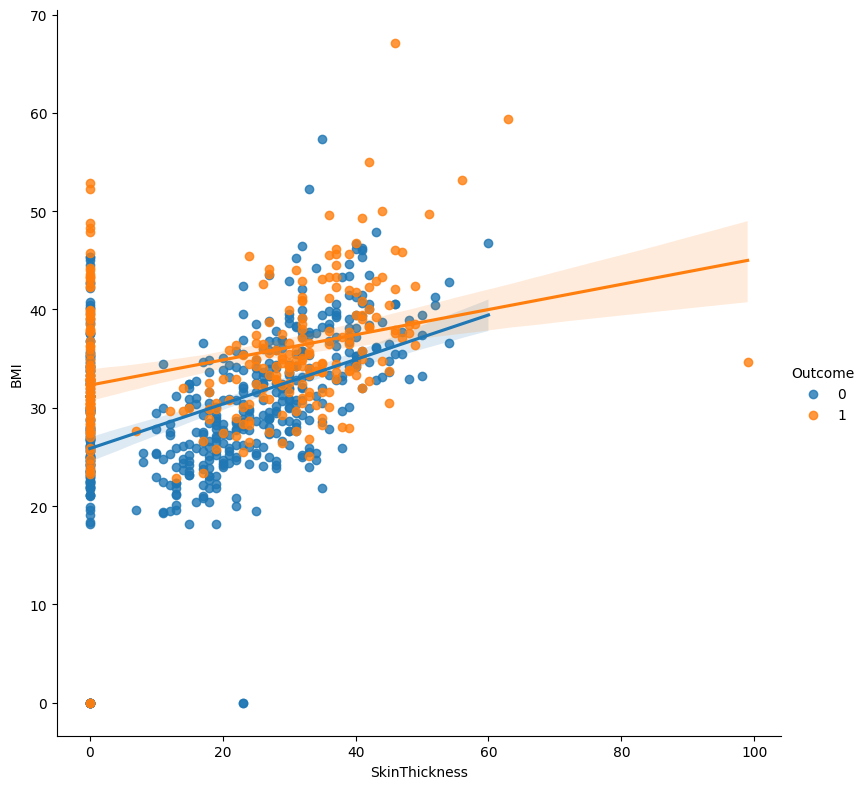

In [13]:
sns.lmplot(x='SkinThickness', y= 'BMI', hue='Outcome', data=df , height = 8)
plt.show()

In [14]:

X=df.drop('Outcome', axis=1)
Y=df['Outcome']
X.shape
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [15]:
Y.values

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33, random_state=102)
print(f"rows in train set: {len(x_train)}\nRows in test set: {len(x_test)}\n")

rows in train set: 514
Rows in test set: 254



In [17]:
corr_matrix = df.corr()  #finding correlations
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

<Axes: >

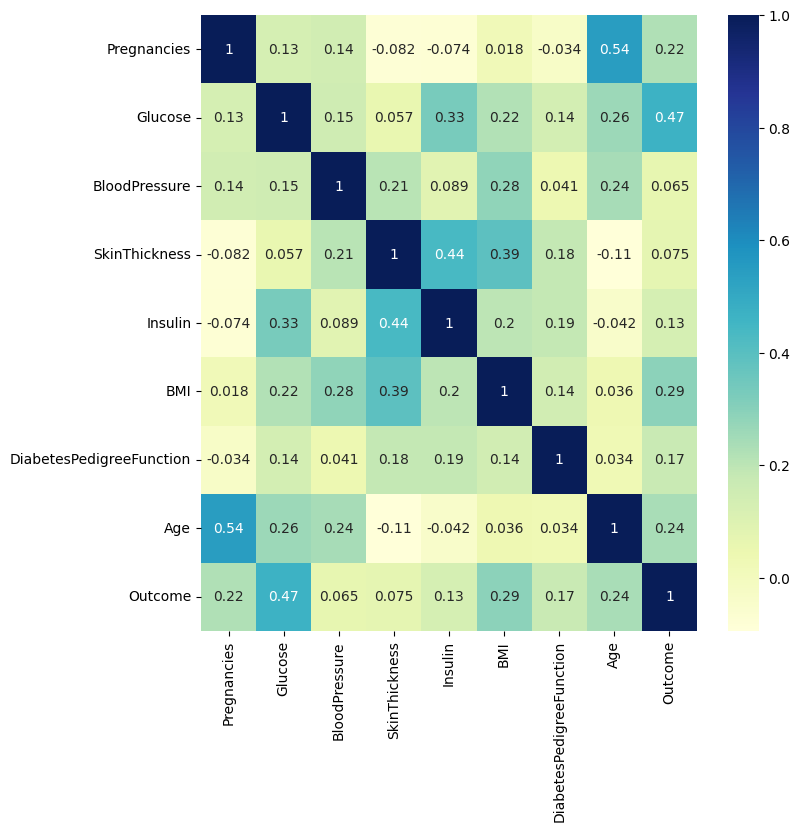

In [18]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', robust=True)

**Decision-Tree Classifier**

In [41]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df.drop(columns = 'Outcome', axis = 1)
y = df.Outcome # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [43]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_test,y_test)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8008658008658008


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       146
           1       0.72      0.74      0.73        85

    accuracy                           0.80       231
   macro avg       0.79      0.79      0.79       231
weighted avg       0.80      0.80      0.80       231



In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


scaler.fit(X)
X_standard = scaler.transform(X)
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# Changing data to a numpy array
input_data_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_array.reshape(1, -1)

# Standardize the input data in one step
std_data = scaler.transform(input_data_reshaped)
print(std_data)


[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
from sklearn import svm
from sklearn.metrics import accuracy_score
model = svm.SVC(kernel = 'linear')



# training the suppoprt vector machine classifier

model.fit(X_train, y_train)
# accuracy score on the training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(" Accuracy score of the training data is : ",training_data_accuracy)
result = model.predict(std_data)
print("The prediction is : ",result)

if (result[0] == 0):
  print("The person is not Diabetic")
else:
  print("The person is Diabetic")


 Accuracy score of the training data is :  0.7802607076350093
The prediction is :  [0]
The person is not Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


**Logistic regression**

In [24]:
from sklearn.linear_model import LogisticRegression
LRModel=LogisticRegression(solver='lbfgs', max_iter=7600)
LRModel.fit(X_train,y_train)

LogisticRegression(max_iter=7600)

In [25]:
predictions_diabetes=LRModel.predict(X_test)
print(classification_report(y_test,predictions_diabetes))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [26]:
x=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
data=[6,148,72,35,0,33.6,0.627,50]
paitentid_1=pd.DataFrame([data],columns=x)
paitentid_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50


In [27]:
predictions_diabetes=LRModel.predict(paitentid_1)
print(predictions_diabetes)
if predictions_diabetes == 0:
  print("Not Diabatic")
else:
  print("Diabatic")
paitentid_1

[1]
Diabatic


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50


In [28]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


**KNN**

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [36]:
# Features (X) and Target variable (y)
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choose the value of k
k = 19

# Create KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        99
           1       0.71      0.55      0.62        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154

[[87 12]
 [25 30]]


In [40]:
new_individual_features = [3, 150, 80, 30, 0, 30, 0.6, 40]  # Replace with actual feature values
scaled_new_individual = scaler.transform([new_individual_features])
prediction = knn_classifier.predict(scaled_new_individual)

# Step 6: Display the result
if prediction[0] == 1:
    print("The person has diabetes.")
else:
    print("The person doesn't have diabetes.")


The person has diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**The Best Model Among Decision-Tree,LogisticRegression and KNN is Decision-Tree with accuracy 0.8008658008658008**

In [48]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_test,y_test)
y_pred = clf.predict(X_test)
print("Accuracy of Decision-Tree:",metrics.accuracy_score(y_test, y_pred))


Accuracy of Decision-Tree: 0.8008658008658008



1. **Model Comparison and Selection:**
   - The Decision-Tree, Logistic Regression, and KNN models were implemented and evaluated for predicting diabetes in the dataset.
   - Among the three models, the Decision-Tree model achieved the highest accuracy of 0.8009 on the test set.
   - The accuracy metric serves as a key performance indicator, indicating the proportion of correctly predicted instances.

2. **Decision-Tree Model Performance:**
   - The Decision-Tree model demonstrated superior performance with an accuracy of 0.8009, suggesting its effectiveness in capturing complex relationships within the dataset.
   - Decision-Tree models are known for their ability to handle non-linear relationships and interactions between features, making them a suitable choice for this task.

3. **Consideration of Model Complexity:**
   - The decision to select the Decision-Tree model was not solely based on accuracy but also considered the complexity of the model.
   - Decision-Tree models are inherently interpretable, providing insights into the decision-making process, which can be crucial for understanding the factors influencing diabetes predictions.

4. **Future Work and Model Refinement:**
   - While the Decision-Tree model performed well, there is room for further improvement through hyperparameter tuning and feature engineering.
   - Future work may involve experimenting with different hyperparameter settings, exploring ensemble methods, or incorporating domain-specific knowledge to enhance model performance.
